In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('df_2008_2018.csv')
df.head()

,gid,origin_id,uf,pathrow,mainclass,class_name,dsfnv,julday,view_date,ano,areakm_squared,scene_id,publish_ye,lon,lat,day,month,year,states
0,282618,580137.0,MA,22164,DESMATAMENTO,d2017,2016.0,221.0,2017-08-09 00:00:00,2017.0,0.012362,100624.0,2017-01-01 00:00:00,-46.147619,-5.115730,9,8,2017,Maranhao
1,593800,1114637.0,MT,22669,DESMATAMENTO,d2008,NaN,168.0,2008-06-16 00:00:00,2008.0,0.306214,527.0,2008-01-01 00:00:00,-54.881533,-12.708523,16,6,2008,Mato Grosso
2,816637,25644.0,PA,22562,DESMATAMENTO,d2018,NaN,236.0,2018-08-24 12:00:00,2018.0,0.067416,101109.0,2018-01-01 00:00:00,-50.980997,-3.530574,24,8,2018,Para
3,393766,724609.0,PA,22466,DESMATAMENTO,d2009,NaN,220.0,2009-08-08 00:00:00,2009.0,0.078053,879.0,2009-01-01 00:00:00,-50.702206,-8.960971,8,8,2009,Para
4,117567,366852.0,RR,23258,DESMATAMENTO,d2009,NaN,292.0,2009-10-19 00:00:00,2009.0,0.000377,974.0,2009-01-01 00:00:00,-60.262828,2.378392,19,10,2009,Roraima


In [3]:
x = df.iloc[:1000].values 
print(x)
y = df.iloc[:1000].values  

[[282618 580137.0 'MA' ... 8 2017 'Maranhao']
 [593800 1114637.0 'MT' ... 6 2008 'Mato Grosso']
 [816637 25644.0 'PA' ... 8 2018 'Para']
 ...
 [391318 721723.0 'MT' ... 8 2013 'Mato Grosso']
 [793709 2754.0 'AM' ... 9 2018 'Amazonas']
 [620968 1194229.0 'PA' ... 7 2008 'Para']]


In [4]:
df.drop(["lon", "uf", "states", "mainclass", "class_name", "dsfnv", "view_date", "publish_ye", "gid", "origin_id", "scene_id", "pathrow", "ano"], axis=1, inplace=True)
#feature_names = data.columns
df.head()

,julday,areakm_squared,lat,day,month,year
0,221.0,0.012362,-5.115730,9,8,2017
1,168.0,0.306214,-12.708523,16,6,2008
2,236.0,0.067416,-3.530574,24,8,2018
3,220.0,0.078053,-8.960971,8,8,2009
4,292.0,0.000377,2.378392,19,10,2009


In [5]:
df = df.round({'lat': 1})

In [6]:
df = df.round({'areakm_squared': 1})

In [7]:
df.head()

,julday,areakm_squared,lat,day,month,year
0,221.0,0.0,-5.1,9,8,2017
1,168.0,0.3,-12.7,16,6,2008
2,236.0,0.1,-3.5,24,8,2018
3,220.0,0.1,-9.0,8,8,2009
4,292.0,0.0,2.4,19,10,2009


In [9]:
df = df.dropna()


In [11]:
df.head()

,julday,areakm_squared,lat,day,month,year
0,221.0,0.0,-5.1,9,8,2017
1,168.0,0.3,-12.7,16,6,2008
2,236.0,0.1,-3.5,24,8,2018
3,220.0,0.1,-9.0,8,8,2009
4,292.0,0.0,2.4,19,10,2009


In [13]:
x = df.iloc[:, 1:2].values 
print(x)
y = df.iloc[:, 2].values  

[[0. ]
 [0.3]
 [0.1]
 ...
 [0.1]
 [0.2]
 [0.5]]


In [14]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y)  

RandomForestRegressor(random_state=0)

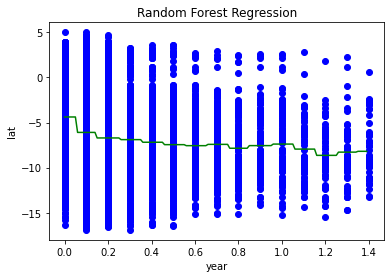

In [16]:
# Visualising the Random Forest Regression results
  
# arange for creating a range of values
# from min value of x to max 
# value of x with a difference of 0.01 
# between two consecutive values
X_grid = np.arange(min(x), max(x), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(x, y, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('year')
plt.ylabel('lat')
plt.show()
